# Supermarket store branches sales analysis

# Required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [3]:
data = pd.read_csv('../input/storesdataset/Stores.csv')

# Understand the data

In [4]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


* First Column is store_ID which have no use, So we will drop it
* Store area ,we can use this data to find the co-Relations
* Item availabe will have a relation with Others so we have to keep it
* Daily Customers can give us insights of avg customers speding

In [5]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


# Information 

* The are total 896 store ids starting from 1 and ending on 896.
* The minimum store size is 775 and the biggest store size is 2667 yard per square meter.
* A store with minimum number of items is 932 and there is a store that has maximum of 2667 items available.
* Minimum number of customers that a store ever had was 10 and maximum was 1560 on average day over month.
* Minimum number of sales were 14920 and the maximum number of sales were 116320

# Data Cleaning

 **data.info( ): All information like ' Non-Null Values' & 'Data Type' for each column**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB



  **data.isnull( ).sum( ): Total NULL values in each columns**



In [7]:
data.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

**There are no null and faulty values in the Dataset so data is already clean**

# Data Visualization

In [8]:
data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [9]:
data.drop(['Store ID '],axis=1,inplace=True)

In [10]:
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


#  Multiple graph at once

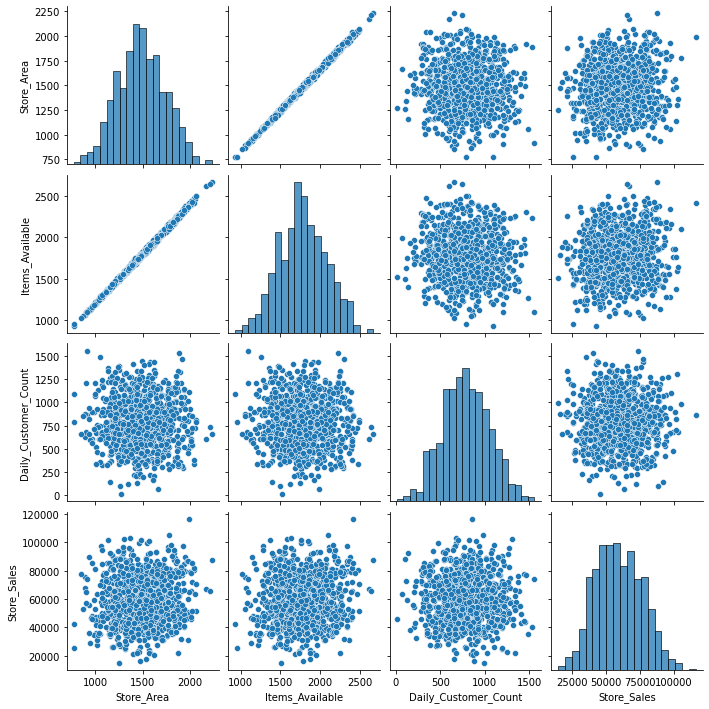

In [11]:
sns.pairplot(data)

<AxesSubplot:xlabel='Items_Available', ylabel='Store_Area'>

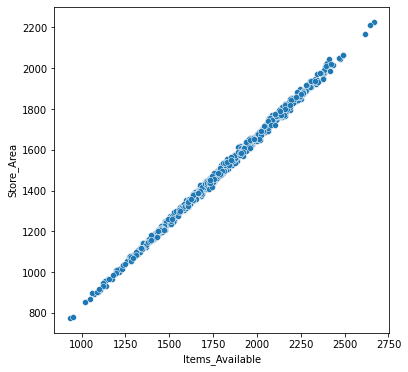

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Items_Available',y='Store_Area', data=data)

**From the above relation we can see that Store area is directly proptional to Item avialable**

#  Outliers 

<AxesSubplot:xlabel='Store_Sales'>

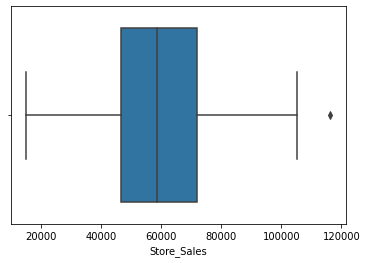

In [13]:
sns.boxplot(x=data.Store_Sales)

# Outliers in all columns

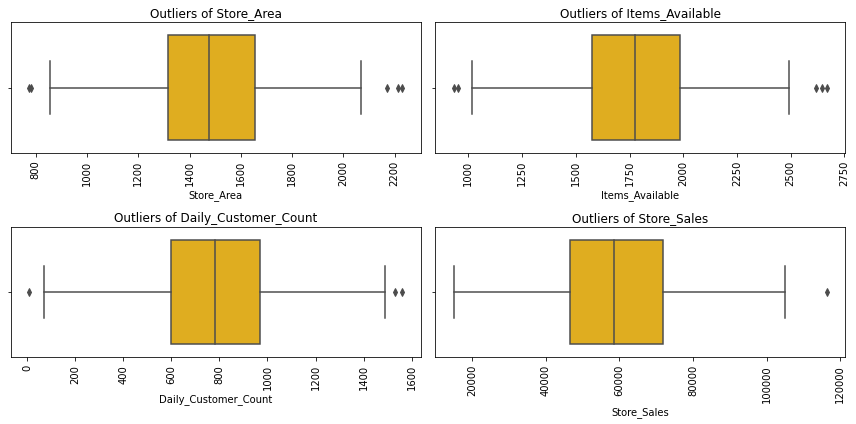

In [14]:
# Create a list for all columns
cols = ['Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales']

# Define a functon to plot a graph
def data_outliers(x,fig):
    # subplot is used to plot multiple graph
    plt.subplot(2,2,fig)
    # title of the graph
    plt.title('Outliers of ' + x)
    # plot the graph
    sns.boxplot(x=data[x], palette=("Wistia"))
    plt.xticks(rotation= 90)
    
plt.figure(figsize=(12,6))
# call the funtion for each column
for e, i in enumerate(cols):
    data_outliers(i,e+1)

plt.tight_layout()
plt.show();

In [15]:
#outliars in Store_Sales column
#calculate Quartiles
print('1 Quartile: ',data['Store_Sales'].quantile(q=0.25))
print('2 Quartile: ',data['Store_Sales'].quantile(q=0.50))
print('3 Quartile: ',data['Store_Sales'].quantile(q=0.75))
print('4 Quartile: ',data['Store_Sales'].quantile(q=1.00))
print('Sales above: ',data['Store_Sales'].quantile
(q=0.75) + 1.5 * (data['Store_Sales'].quantile(q=0.75) - data['Store_Sales'].quantile(q=0.25)),'are outliars')
data.drop(data[data.Store_Sales > 109886.25].index, inplace = True)


1 Quartile:  46530.0
2 Quartile:  58605.0
3 Quartile:  71872.5
4 Quartile:  116320.0
Sales above:  109886.25 are outliars


<AxesSubplot:xlabel='Store_Sales'>

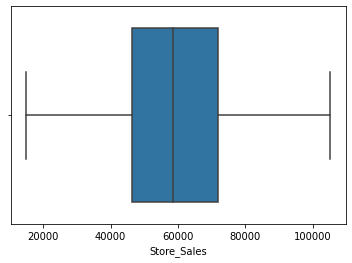

In [16]:
sns.boxplot(data['Store_Sales'])

In [17]:
#outliars in Store_Area column
#calculate Quartiles
print('1 Quartile: ',data['Store_Area'].quantile(q=0.25))
print('2 Quartile: ',data['Store_Area'].quantile(q=0.50))
print('3 Quartile: ',data['Store_Area'].quantile(q=0.75))
print('4 Quartile: ',data['Store_Area'].quantile(q=1.00))
#IQR = Q3- Q1
IQR = data['Store_Area'].quantile(q=0.75) - data['Store_Area'].quantile(q=0.25)
print('lower_limit: ',data['Store_Area'].quantile(q=0.25) - 1.5 * IQR)
print('upper_limit: ',data['Store_Area'].quantile(q=0.75) + 1.5 * IQR)
data.drop(data[data.Store_Area < 812.5].index, inplace = True)
data.drop(data[data.Store_Area > 2156.5].index, inplace = True)

1 Quartile:  1316.5
2 Quartile:  1477.0
3 Quartile:  1652.5
4 Quartile:  2229.0
lower_limit:  812.5
upper_limit:  2156.5


<AxesSubplot:xlabel='Store_Area'>

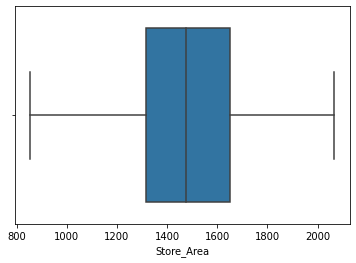

In [18]:
sns.boxplot(data['Store_Area'])